In [101]:
!pip install datasist

In [102]:
!pip install xgboost

In [152]:
!pip install imblearn

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split , RandomizedSearchCV , StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [106]:
data = pd.read_csv(r"/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [107]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [109]:
data.isnull().sum().sort_values(ascending=False)

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [110]:
data.duplicated().sum()

np.int64(0)

In [111]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [112]:
data.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [113]:
categorical_features = data.select_dtypes(include='object').columns
categorical_features

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

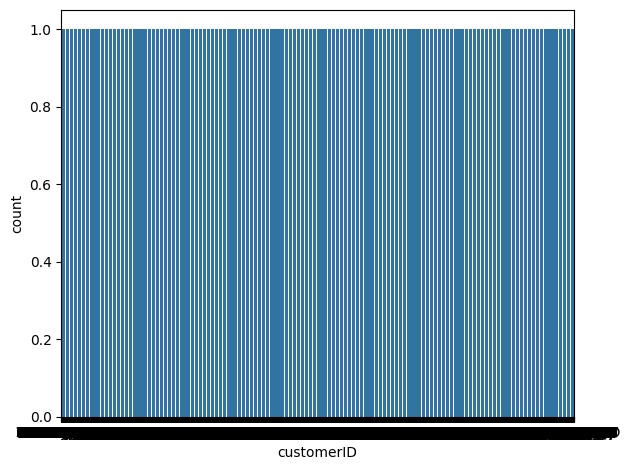

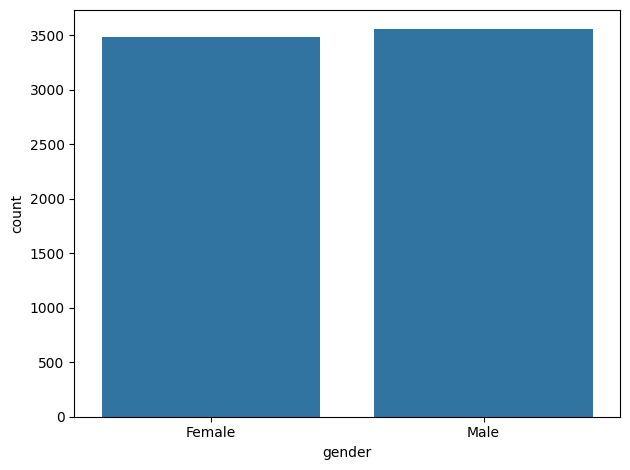

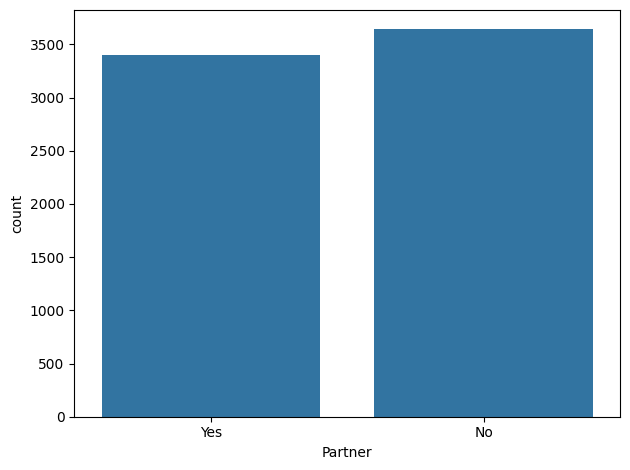

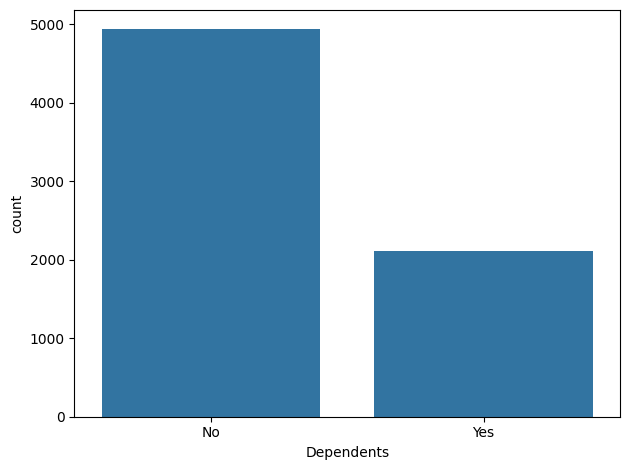

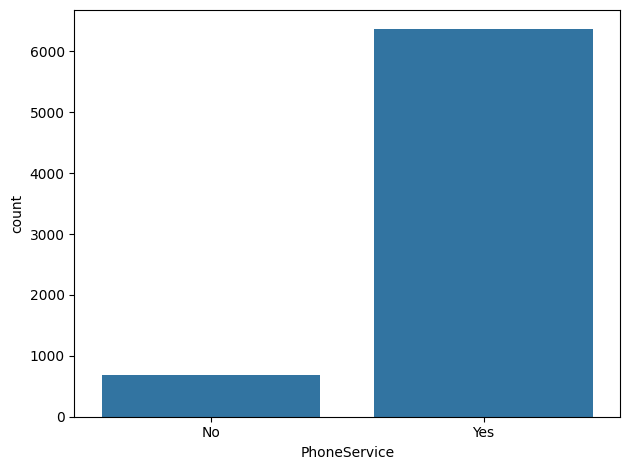

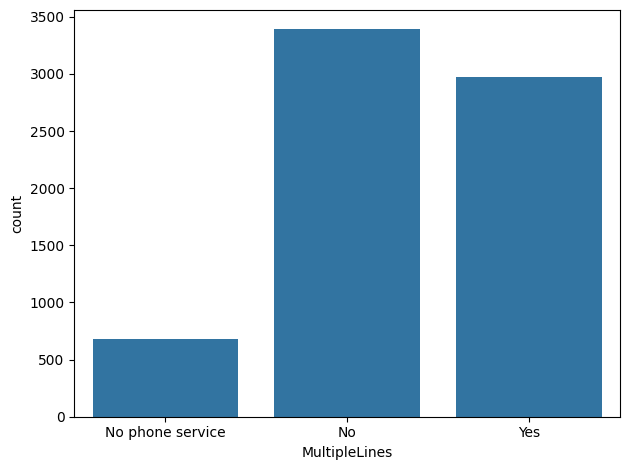

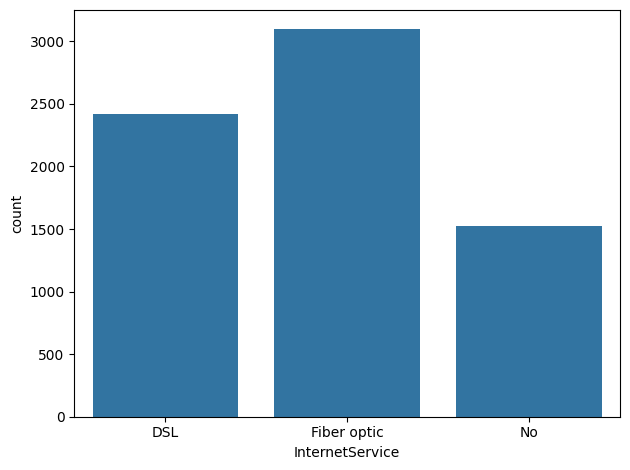

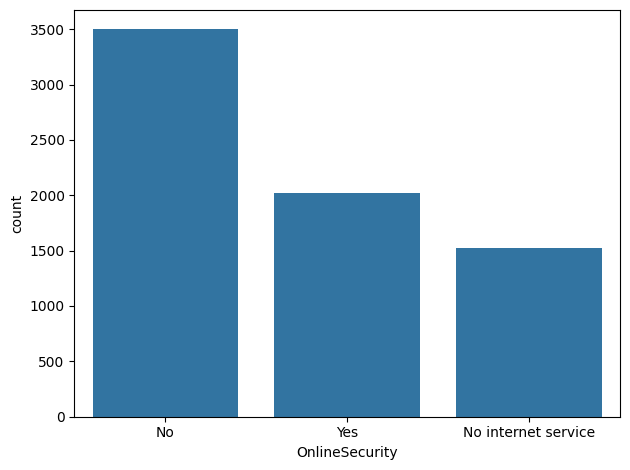

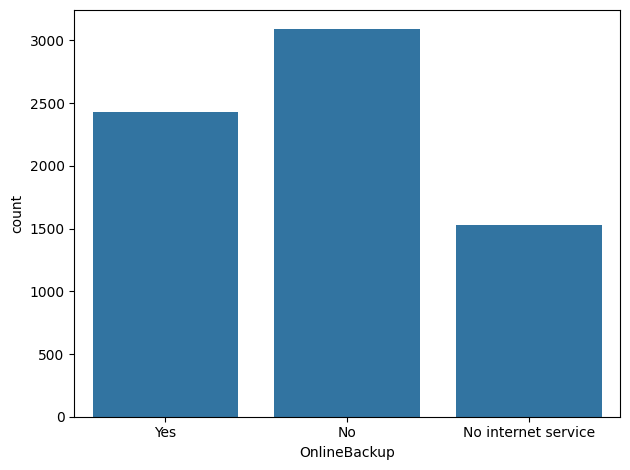

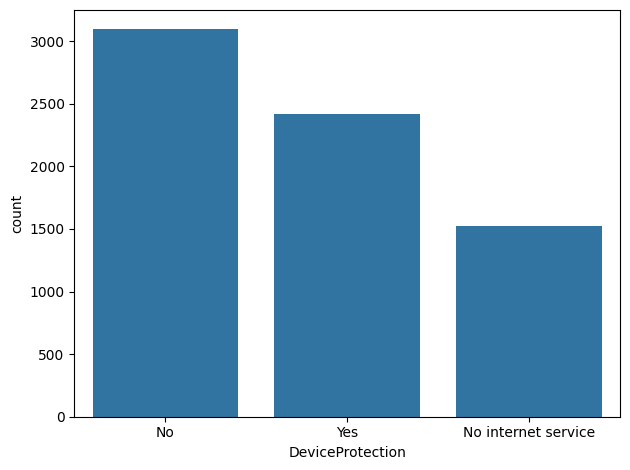

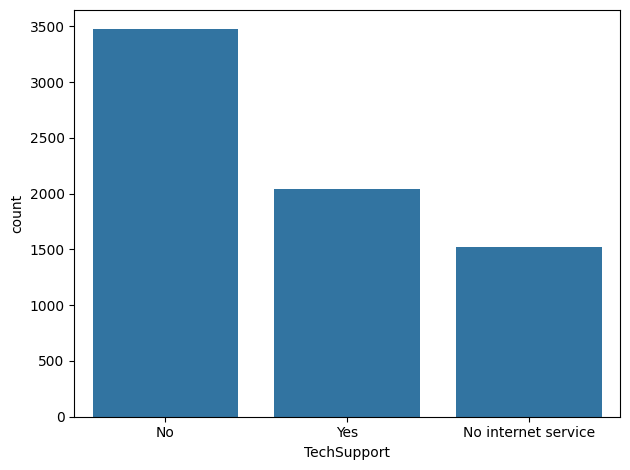

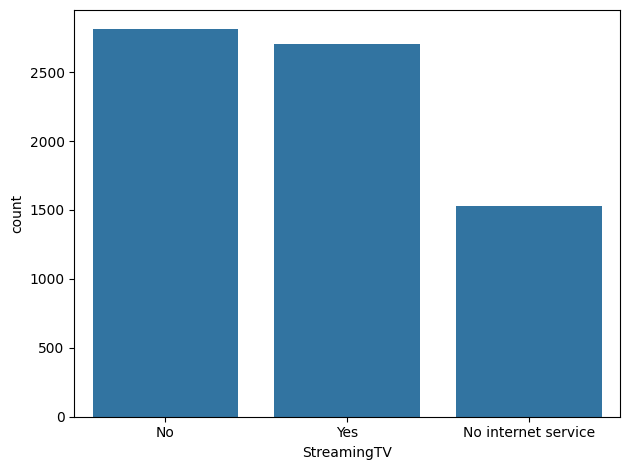

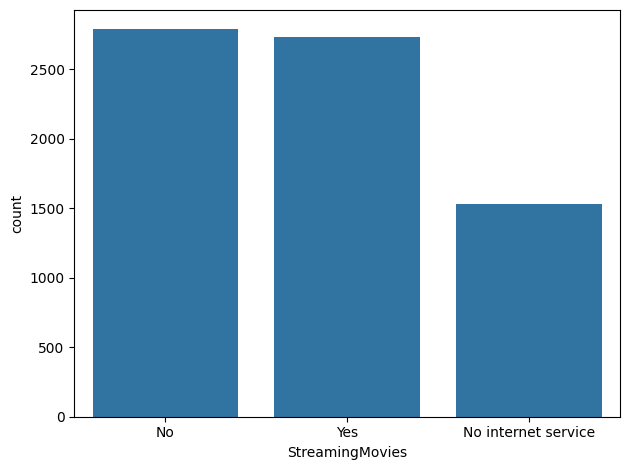

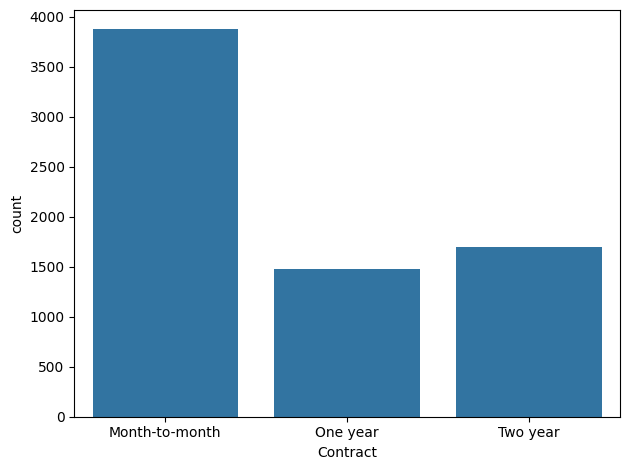

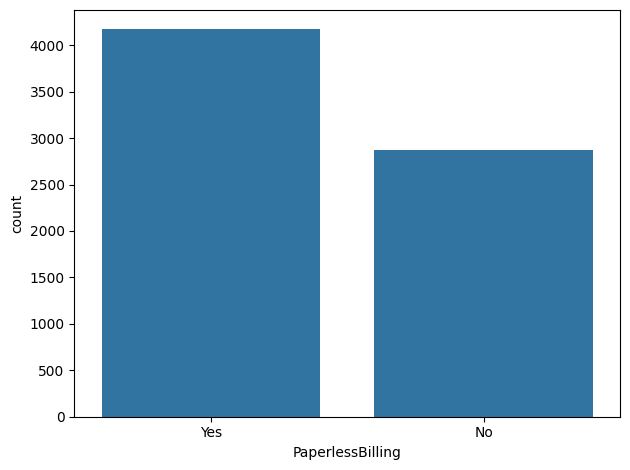

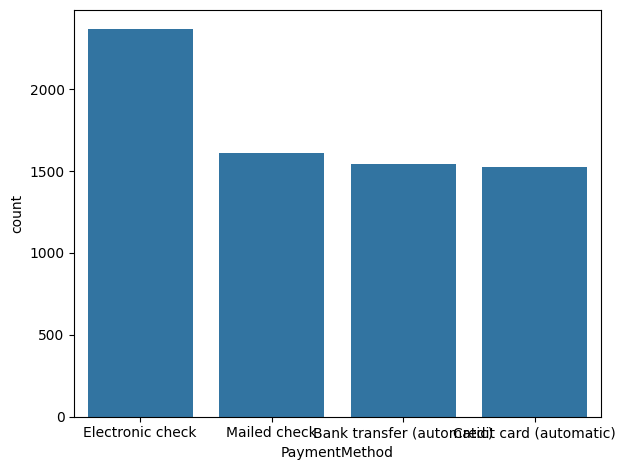

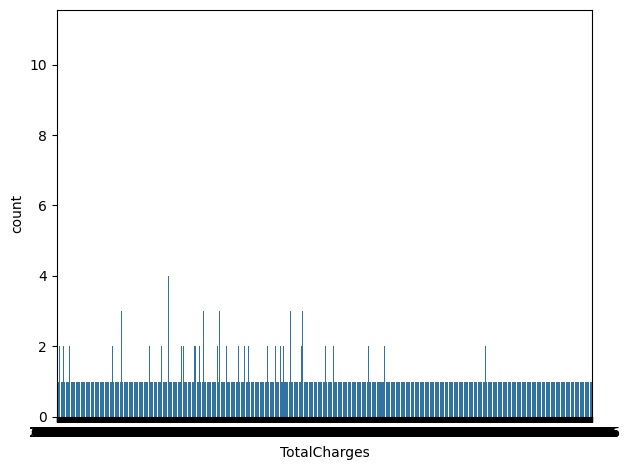

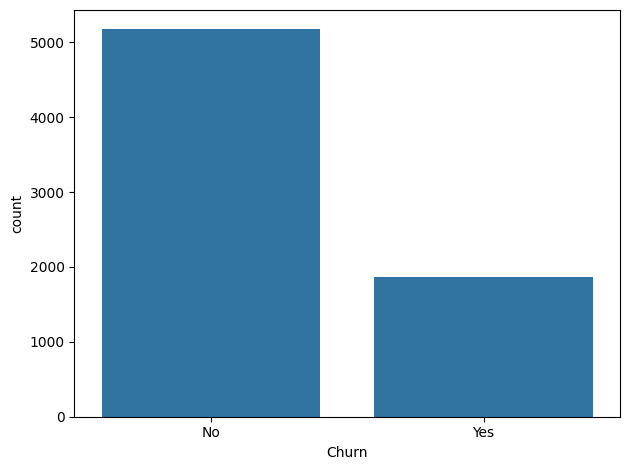

In [114]:
for col in categorical_features:
  sns.countplot(data=data, x=col)
  plt.tight_layout()
  plt.show()
  print("\n\n")

In [115]:
for col in categorical_features:
  print(data[col].value_counts())
  print(f"\n\n{'#'*200}")

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64


########################################################################################################################################################################################################
gender
Male      3555
Female    3488
Name: count, dtype: int64


########################################################################################################################################################################################################
Partner
No     3641
Yes    3402
Name: count, dtype: int64


########################################################################################################################################################################################################
Dependents
No     4933
Yes    2110
Name: co

In [116]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges']

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [117]:
numerical_features = data.select_dtypes(include=np.number).columns
numerical_features

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

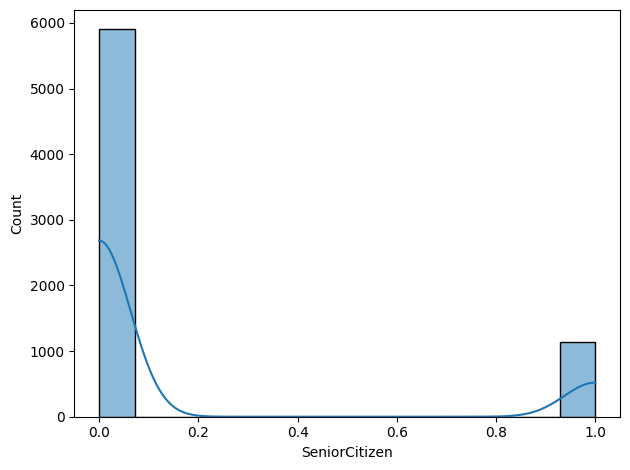

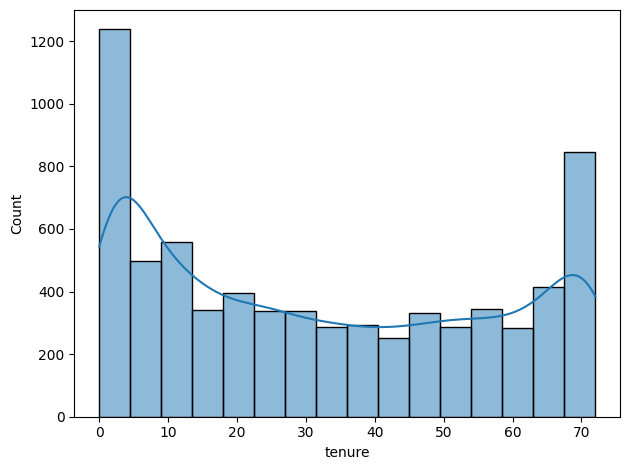

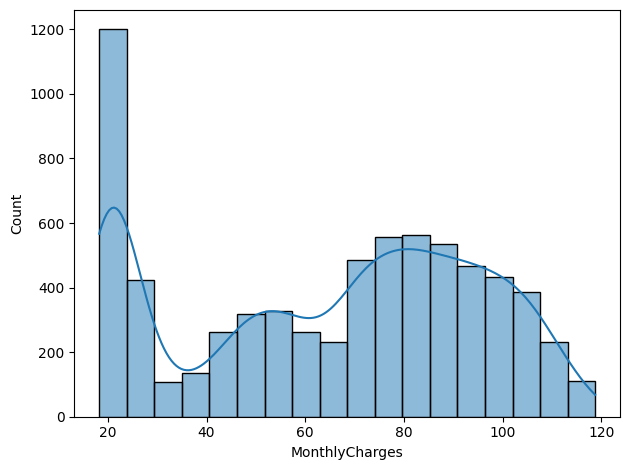

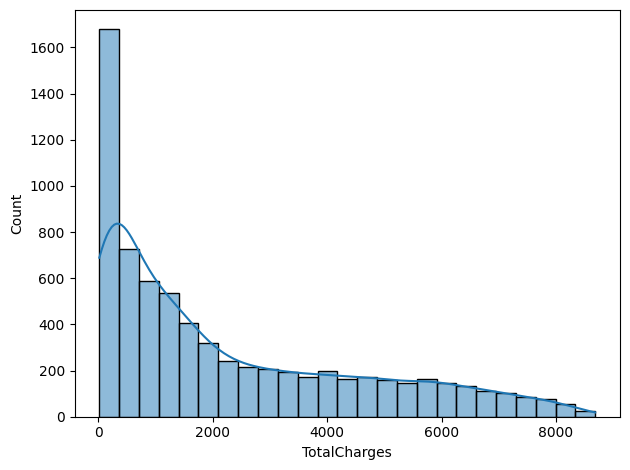

In [118]:
for col in numerical_features:
  sns.histplot(data=data, x=col, kde=True)
  plt.tight_layout()
  plt.show()
  print("\n\n")

In [119]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'MultipleLines',
        'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling']

for col in cols:
    data[col] = data[col].replace({'No internet service': 'No'})

    data[cols] = data[cols].replace({'Yes': 1, 'No': 0})


In [120]:
data['MultipleLines'].replace({'No phone service': 'No'}, inplace=True)
data['MultipleLines'] = data['MultipleLines'].replace({'Yes': 1, 'No': 0})

In [121]:
cols = ['PaperlessBilling','PhoneService','Dependents','Partner']
for col in cols:
  data[cols] = data[cols].replace({'Yes': 1, 'No': 0})

In [122]:
data = pd.get_dummies(data=data,columns=['Contract','PaymentMethod','InternetService'],drop_first=True)

In [123]:
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})


In [124]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,29.85,29.85,No,False,False,False,True,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,56.95,1889.50,No,True,False,False,False,True,False,False
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,53.85,108.15,Yes,False,False,False,False,True,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,42.30,1840.75,No,True,False,False,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,Yes,False,False,False,True,False,True,False


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   MultipleLines                          7043 non-null   int64  
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  Tech

In [126]:
data.drop('customerID', axis=1, inplace=True)

In [127]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [128]:
data.isnull().sum().sort_values(ascending=False)

,0
TotalCharges,11
gender,0
Partner,0
SeniorCitizen,0
tenure,0
PhoneService,0
MultipleLines,0
Dependents,0
OnlineSecurity,0
OnlineBackup,0


In [129]:
imputer = IterativeImputer(random_state=42)
data_imputed = imputer.fit_transform(data)
data = pd.DataFrame(data_imputed, columns=data.columns)

In [130]:
data.isnull().sum().sort_values(ascending=False)

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [157]:
data['Churn'].value_counts()

,count
Churn,
0.0,5174
1.0,1869


In [158]:
data['Churn'].value_counts(normalize=True)

,proportion
Churn,
0.0,0.73463
1.0,0.26537


In [131]:
x = data.drop('Churn', axis=1)
y = data['Churn']

In [132]:
selector = SelectKBest(score_func=f_classif, k=10)
x_selected = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support()]

In [133]:
selected_features

Index(['tenure', 'OnlineSecurity', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

In [134]:
x = x[selected_features]

In [145]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [153]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)


In [137]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [154]:
def ht(model,params):
  random_search = RandomizedSearchCV(model,params,cv=kf,scoring='f1')
  random_search.fit(x,y)
  print(f"{model}")
  print(f"best params : {random_search.best_params_}")
  print(f"best score : {random_search.best_score_}")

In [155]:
lr_hyperparameters = {
        'penalty': ['l2','l1','elasticnet','none'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [100, 200, 500]
    }

ht(LogisticRegression(),lr_hyperparameters)

LogisticRegression()
best params : {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 1}
best score : 0.7738312918156044


In [159]:
knn_hyperparameters = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'euclidean', 'manhattan']
    }

ht(KNeighborsClassifier(),knn_hyperparameters)

KNeighborsClassifier()
best params : {'weights': 'distance', 'n_neighbors': 9, 'metric': 'euclidean'}
best score : 0.8219828243427469


In [160]:
nb_hyperparameters = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    }

ht(GaussianNB(),nb_hyperparameters)

GaussianNB()
best params : {'var_smoothing': 1e-09}
best score : 0.770213936962924


In [161]:
dt_hyperparameters = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    }

ht(DecisionTreeClassifier(),dt_hyperparameters)

DecisionTreeClassifier()
best params : {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}
best score : 0.7834129802385892


In [162]:
rf_hyperparameters = {
        'n_estimators': [100, 200, 500],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }

ht(RandomForestClassifier(),rf_hyperparameters)

RandomForestClassifier()
best params : {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}
best score : 0.813573780338966


In [163]:
gb_hyperparameters = {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.6, 0.8, 1.0],
        'max_features': ['sqrt', 'log2', None]
    }


ht(GradientBoostingClassifier(),gb_hyperparameters)

GradientBoostingClassifier()
best params : {'subsample': 0.6, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 6, 'learning_rate': 0.05}
best score : 0.822923749129572


In [164]:
xg_hyperparameters = {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3],
        'reg_alpha': [0, 0.01, 0.1],
        'reg_lambda': [1, 1.5, 2]
    }


ht(XGBClassifier(),xg_hyperparameters)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
best params : {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
best score : 0.799234650761788
